3# 원, 삼각형, 사각형 구분하기
- 어려운 테스트 문제들 기존 CNN 모델로 푸는 경우

1. 데이터 불러오기

In [1]:
from google.colab import files 
up = files.upload()

Saving hard_handwriting_shape.zip to hard_handwriting_shape.zip


In [2]:
!unzip hard_handwriting_shape.zip -d hard_handwriting >/dev/null

In [3]:
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt

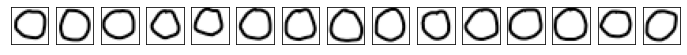

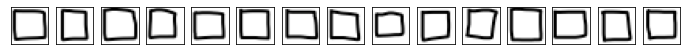

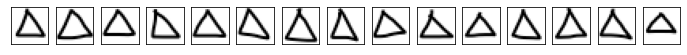

In [4]:
shapes = ['circle', 'rectangle', 'triangle']

# train data
for shape in shapes:
  dir_name = f'hard_handwriting/train/{shape}'
  plt.figure(figsize=(12,1))
  for i, fname in enumerate(glob(f'{dir_name}/*.png')):
    img = Image.open(fname)
    plt.subplot(1, 15, i+1), plt.imshow(img)
    plt.xticks([]), plt.yticks([])
  plt.show()

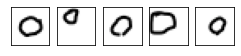

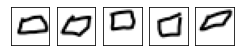

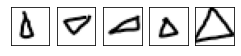

In [5]:
# test data
for shape in shapes:
  dir_name = f'hard_handwriting/test/{shape}'
  plt.figure(figsize=(4,1))
  for i, fname in enumerate(glob(f'{dir_name}/*.png')):
    img = Image.open(fname)
    plt.subplot(1, 5, i+1), plt.imshow(img)
    plt.xticks([]), plt.yticks([])
  plt.show()

In [6]:
# 차원 확인 
import numpy as np
import cv2 
cv2.imread('hard_handwriting/train/circle/circle001.png')[:,:,::-1].shape

(24, 24, 3)

2. 데이터 셋 생성하기

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train
train_datagen = ImageDataGenerator(rescale=1/225.)
train_data_generator = train_datagen.flow_from_directory(
    'hard_handwriting/train', target_size=(24,24), batch_size=3, class_mode='categorical' # 모양 3개라서 'categorical'
)

Found 45 images belonging to 3 classes.


In [9]:
# test
test_datagen = ImageDataGenerator(rescale=1/225.)
test_data_generator = test_datagen.flow_from_directory(
    'hard_handwriting/test', target_size=(24,24), batch_size=3, class_mode='categorical' # 모양 3개라서 'categorical'
)

Found 15 images belonging to 3 classes.


3. 모델 정의/설정/학습/평가

In [12]:
import numpy as np
import tensorflow as tf
seed = 2022
tf.random.set_seed(seed)
np.random.seed(seed)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [20]:
model = Sequential([
                    Conv2D(32, (3,3), input_shape=(24,24,3), activation='relu'),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPooling2D(),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(3, activation='softmax'),
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 22, 22, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6400)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               819328    
                                                                 
 dense_5 (Dense)             (None, 3)                 387       
                                                      

In [26]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [27]:
model.fit(
    train_data_generator, steps_per_epoch=15, epochs=50,
    validation_data=test_data_generator, validation_steps=5
)
# batch_size=3 --> 45 맞추기 위해 steps_per_batch=15

Epoch 1/50
15/15 [==============================] - 11s 19ms/step - loss: 0.9368 - accuracy: 0.6000 - val_loss: 1.1758 - val_accuracy: 0.3333
Epoch 2/50
15/15 [==============================] - 0s 8ms/step - loss: 0.2231 - accuracy: 0.9556 - val_loss: 1.9109 - val_accuracy: 0.3333
Epoch 3/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0244 - accuracy: 1.0000 - val_loss: 3.0306 - val_accuracy: 0.3333
Epoch 4/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 3.4890 - val_accuracy: 0.3333
Epoch 5/50
15/15 [==============================] - 0s 8ms/step - loss: 6.7022e-04 - accuracy: 1.0000 - val_loss: 3.7327 - val_accuracy: 0.3333
Epoch 6/50
15/15 [==============================] - 0s 8ms/step - loss: 2.4176e-04 - accuracy: 1.0000 - val_loss: 3.8872 - val_accuracy: 0.3333
Epoch 7/50
15/15 [==============================] - 0s 8ms/step - loss: 1.7444e-04 - accuracy: 1.0000 - val_loss: 4.0037 - val_accuracy: 0.3333
Epoch 

In [29]:
model.evaluate(test_data_generator, steps=5)

5/5 [==============================] - 0s 5ms/step - loss: 5.7408 - accuracy: 0.3333


[5.740752220153809, 0.3333333432674408]

In [30]:
model.evaluaet(test_data_generator)

AttributeError: ignored